# Results Visualization

## Introduction
You have cleaned the data, found the factors, and identified the important features. But if you can't show your results to a stakeholder (like a site manager or funding agency), the analysis is useless.

**Visualization** is the bridge between complex math and human understanding. 

In this notebook, we will create publication-ready plots:
1. **Correlation Heatmap**: A color-coded grid to spot relationships instantly.
2. **Distribution Plots**: Understanding the data landscape.
3. **Boxplots**: To compare groups (e.g., "Is the crack width worse in buildings with poor ratings?").
4. **Pairplots**: To see everything at once.

All plots can be saved as high-resolution images for reports!

## Why Visualization Matters for Heritage Preservation

### The Problem

Imagine you have a spreadsheet with 200 buildings and 15 variables. You could stare at 3,000 numbers... or you could create a picture that reveals patterns instantly.

**Example**:
- **Looking at numbers**: "Building A has moisture=45, Building B has moisture=67, Building C has moisture=23..."
- **Looking at a plot**: "Ah! Buildings in the North district all have high moisture. That's the pattern!"

### What Visualization Does

**1. Reveals Patterns**
- Which variables move together?
- Are there outliers (unusual buildings)?
- Do districts differ systematically?

**2. Communicates Results**
- Show stakeholders: "Here's why these 20 buildings need urgent attention"
- One good plot > 100 pages of numbers

**3. Validates Analysis**
- Check if data looks reasonable
- Spot errors (e.g., impossible values)
- Verify model assumptions

### What You'll Learn

This notebook shows you how to create **four essential plot types**:

| Plot Type | What It Shows | When to Use |
|-----------|---------------|-------------|
| **Correlation Heatmap** | Which variables relate to each other | Finding patterns, checking multicollinearity |
| **Distribution Plot** | How values are spread out | Understanding typical vs. unusual values |
| **Boxplot** | Comparing groups (e.g., districts) | Seeing if groups differ |
| **Pairplot** | Relationships between multiple variables | Exploring data before modeling |

### No Coding Experience Needed!

Each plot follows the same pattern:
1. **Load your data** (one line of code)
2. **Create the plot** (one line of code)
3. **Customize it** (optional — we provide good defaults)
4. **Save it** (one line of code)

**You'll be able to**:
- ✓ Create publication-quality plots (300 DPI)
- ✓ Customize colors, labels, and titles
- ✓ Save plots for reports and presentations
- ✓ Interpret what the plots are telling you

Let's start!

## Step 0: Upload Your Data (Google Colab Users)

If you're running this in **Google Colab**, you need to upload the `processed_data.csv` file from Notebook 1.

In [1]:
# Uncomment the lines below if you want to upload via code
# from google.colab import files
# uploaded = files.upload()
# print("File uploaded successfully!")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent styling
sns.set_style("white")
sns.set_palette("viridis")

# Load processed data
try:
    df = pd.read_csv('processed_data.csv')
    print("✅ Data loaded successfully!")
    print(f"   Shape: {df.shape}")
except FileNotFoundError:
    print("❌ ERROR: 'processed_data.csv' not found.")
    print("Please run Notebook 1 (Data Preparation) first, or upload the file.")
    raise

# Set plot style to make it look professional
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 100  # High resolution for saving
print("\n✅ Plotting style configured")

✅ Data loaded successfully!
   Shape: (200, 24)

✅ Plotting style configured


## 1. Correlation Heatmap

This is one of the most popular charts in data science. It shows the correlation (relationship) between every pair of variables.

**How to read it:**
- **Red (Positive correlation)**: As one goes up, the other goes up. (e.g., Rainfall and Soil Moisture).
- **Blue (Negative correlation)**: As one goes up, the other goes down.
- **White/Light (Zero correlation)**: No relationship.
- **Numbers**: Correlation coefficient from -1 to +1. Values above |0.7| are considered strong.

Look for the dark squares!

### What is a Correlation Heatmap?

#### The Concept

A **heatmap** is like a color-coded table showing how strongly variables relate to each other.

**Analogy**: Think of a friendship matrix:
- Dark red = "Best friends" (strong positive relationship)
- White = "Don't know each other" (no relationship)
- Dark blue = "Enemies" (strong negative relationship)

#### What the Colors Mean

**Correlation values range from -1 to +1**:

| Value | Color | Meaning | Example |
|-------|-------|---------|----------|
| **+1.0** | Dark red | Perfect positive | As moisture ↑, deterioration ↑ |
| **+0.7** | Red | Strong positive | High moisture usually means high deterioration |
| **+0.3** | Light red | Weak positive | Slight tendency to move together |
| **0.0** | White | No relationship | Variables unrelated |
| **-0.3** | Light blue | Weak negative | Slight tendency to move opposite |
| **-0.7** | Blue | Strong negative | As age ↑, condition rating ↓ |
| **-1.0** | Dark blue | Perfect negative | As one goes up, other goes down exactly |

#### How to Read the Heatmap

**Example**: You see a dark red square where "Moisture" row meets "Crack Width" column.

**Interpretation**: "Buildings with high moisture tend to have wide cracks" (positive correlation)

#### What to Look For

**1. Strong correlations with your outcome variable**
- If predicting "Condition Rating", look at that row/column
- Dark colors (red or blue) = important predictors

**2. Multicollinearity (variables too similar)**
- Two predictor variables with correlation > 0.8 = problem
- Example: "Temperature" and "Humidity" both at 0.9 → pick one

**3. Unexpected patterns**
- "Wait, why do older buildings have BETTER condition?" → Investigate!

#### Practical Example

**You might discover**:
- Moisture + Freeze-thaw cycles = strong predictors of deterioration (dark red)
- District doesn't matter much (white)
- Temperature and Humidity are redundant (dark red between them)

**Action**: Focus monitoring on moisture and freeze-thaw; drop one of Temperature/Humidity.

Let's create one:

✅ Saved: correlation_heatmap.png


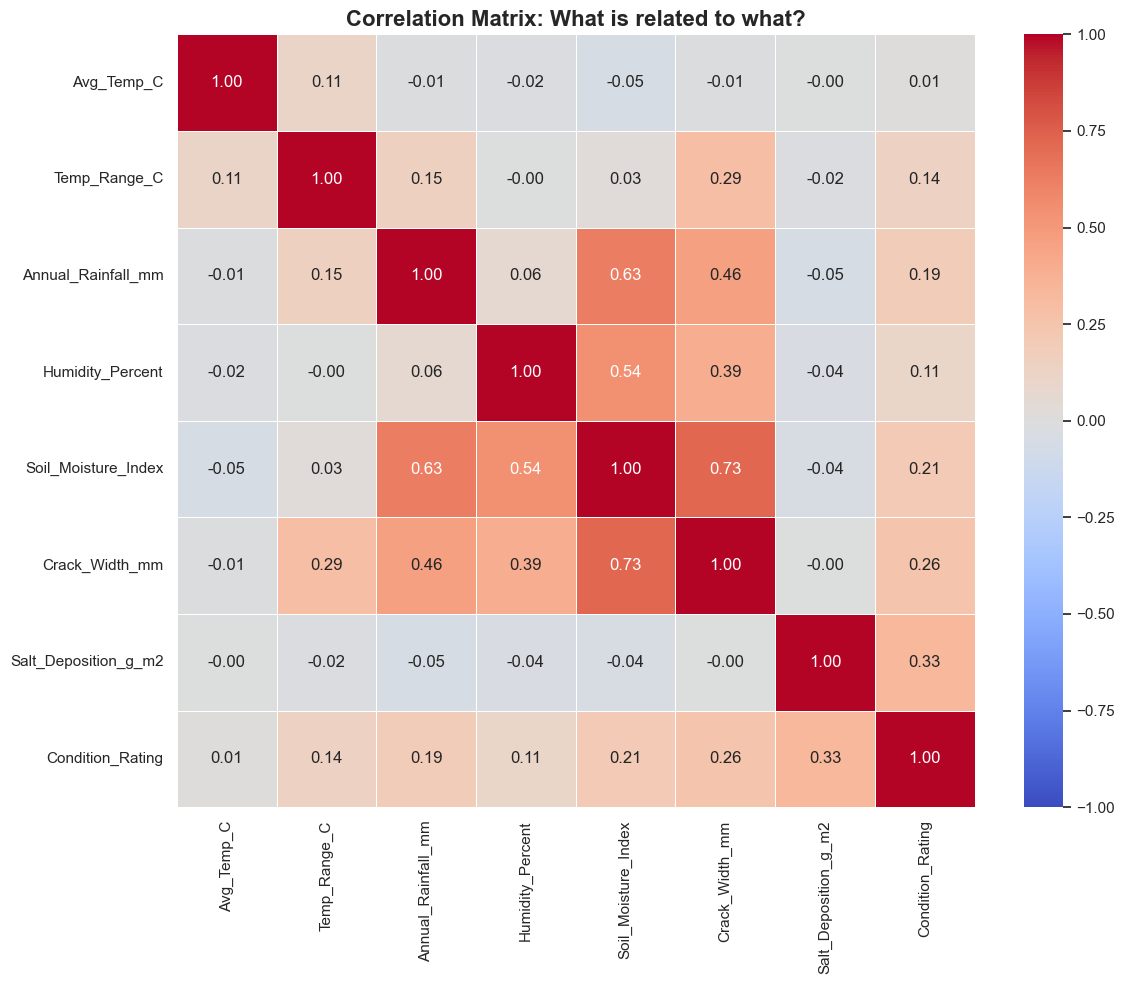


Strongest correlations with Condition Rating:
Salt_Deposition_g_m2    0.331072
Crack_Width_mm          0.257576
Soil_Moisture_Index     0.205024
Annual_Rainfall_mm      0.189576
Temp_Range_C            0.139461
Humidity_Percent        0.107285
Avg_Temp_C              0.013487
Name: Condition_Rating, dtype: float64


In [3]:
# Select numerical columns for correlation
corr_cols = ['Avg_Temp_C', 'Temp_Range_C', 'Annual_Rainfall_mm', 
             'Humidity_Percent', 'Soil_Moisture_Index', 'Crack_Width_mm', 
             'Salt_Deposition_g_m2', 'Condition_Rating']

corr = df[corr_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, 
            vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix: What is related to what?', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✅ Saved: correlation_heatmap.png")
plt.show()

# Identify strongest correlations with Condition_Rating
print("\nStrongest correlations with Condition Rating:")
condition_corr = corr['Condition_Rating'].drop('Condition_Rating').sort_values(ascending=False)
print(condition_corr)

## 2. Distribution of Condition Ratings

Before we dive deeper, let's just see: How many buildings are in good condition vs. bad condition?
This is a simple **Count Plot**.

✅ Saved: condition_distribution.png


/var/folders/t0/r5nh9gq553jgwbsh46rsbhr00000gn/T/ipykernel_70933/2133154341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Condition_Rating', data=df, palette='viridis')


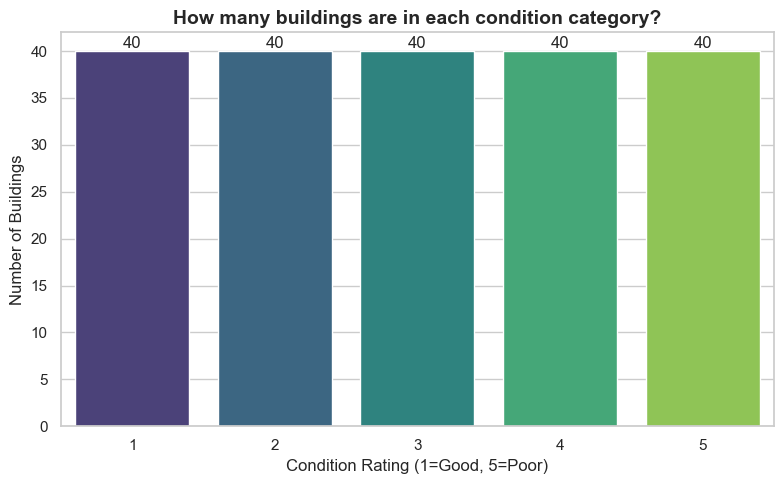


Condition Rating Statistics:
Condition_Rating
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

Mean Condition: 3.00
Median Condition: 3


In [4]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Condition_Rating', data=df, palette='viridis')
plt.title('How many buildings are in each condition category?', fontsize=14, fontweight='bold')
plt.xlabel('Condition Rating (1=Good, 5=Poor)', fontsize=12)
plt.ylabel('Number of Buildings', fontsize=12)

# Add count labels on bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.savefig('figures/condition_distribution.png', dpi=300, bbox_inches='tight')
print("✅ Saved: condition_distribution.png")
plt.show()

# Print statistics
print("\nCondition Rating Statistics:")
print(df['Condition_Rating'].value_counts().sort_index())
print(f"\nMean Condition: {df['Condition_Rating'].mean():.2f}")
print(f"Median Condition: {df['Condition_Rating'].median():.0f}")

## 3. Boxplots: Comparing Groups

Boxplots are fantastic for answering questions like: **"Do buildings in worse condition have wider cracks?"**

**How to read a Boxplot:**
- The **Box** holds the middle 50% of the data (from 25th to 75th percentile).
- The **Line** in the middle is the Median (the typical value).
- The **Whiskers** (lines sticking out) show the range of normal data (1.5× the box height).
- The **Dots** are Outliers (unusual cases beyond the whiskers).

If the boxes move up as you go from Rating 1 to 5, it means there is a clear trend.

/var/folders/t0/r5nh9gq553jgwbsh46rsbhr00000gn/T/ipykernel_70933/3403276375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition_Rating', y='Crack_Width_mm', data=df, ax=axes[0], palette='Reds')
/var/folders/t0/r5nh9gq553jgwbsh46rsbhr00000gn/T/ipykernel_70933/3403276375.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Condition_Rating', y='Salt_Deposition_g_m2', data=df, ax=axes[1], palette='Blues')


✅ Saved: boxplots_comparison.png


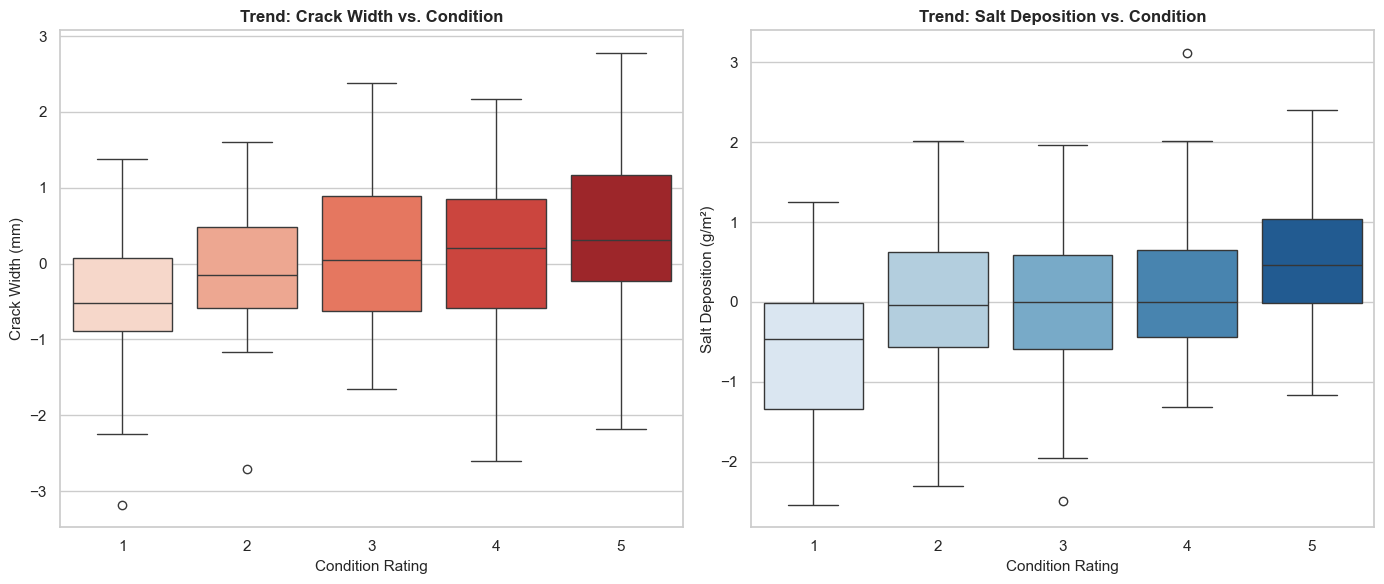

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Crack Width vs Condition
sns.boxplot(x='Condition_Rating', y='Crack_Width_mm', data=df, ax=axes[0], palette='Reds')
axes[0].set_title('Trend: Crack Width vs. Condition', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Condition Rating', fontsize=11)
axes[0].set_ylabel('Crack Width (mm)', fontsize=11)

# Plot 2: Salt Deposition vs Condition
sns.boxplot(x='Condition_Rating', y='Salt_Deposition_g_m2', data=df, ax=axes[1], palette='Blues')
axes[1].set_title('Trend: Salt Deposition vs. Condition', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Condition Rating', fontsize=11)
axes[1].set_ylabel('Salt Deposition (g/m²)', fontsize=11)

plt.tight_layout()
plt.savefig('figures/boxplots_comparison.png', dpi=300, bbox_inches='tight')
print("✅ Saved: boxplots_comparison.png")
plt.show()

## 4. Pairplot

Finally, let's look at multiple variables at once. A **Pairplot** creates a grid of scatterplots.

We color the dots by `Condition_Rating`. 
- If you see distinct clusters of colors, it means those variables are good at separating good buildings from bad ones.
- If the colors are all mixed up, it means the relationship is messy.

**Note**: This can take a moment to generate!

Generating pairplot (this may take a moment)...
✅ Saved: pairplot.png


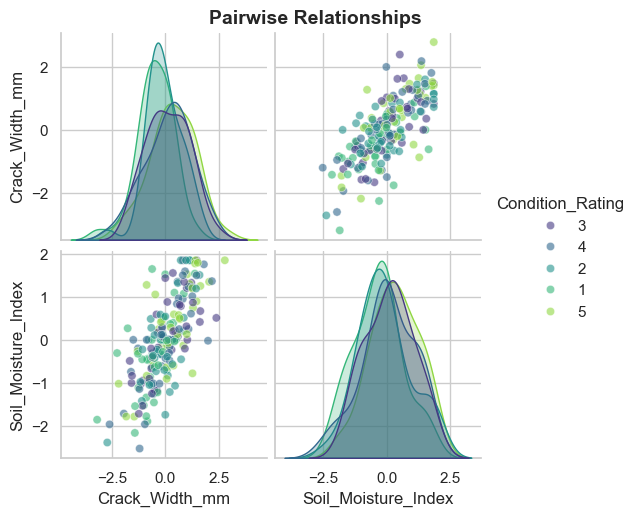

In [6]:
print("Generating pairplot (this may take a moment)...")
pairplot_data = df[['Crack_Width_mm', 'Soil_Moisture_Index', 'Condition_Rating']].copy()
pairplot_data['Condition_Rating'] = pairplot_data['Condition_Rating'].astype(str)

g = sns.pairplot(pairplot_data, hue='Condition_Rating', palette='viridis', 
                 plot_kws={'alpha': 0.6}, diag_kind='kde')
g.fig.suptitle('Pairwise Relationships', y=1.02, fontsize=14, fontweight='bold')
plt.savefig('figures/pairplot.png', dpi=300, bbox_inches='tight')
print("✅ Saved: pairplot.png")
plt.show()

## 5. Summary Statistics Table

Let's create a summary table grouped by Condition Rating:

In [7]:
summary = df.groupby('Condition_Rating')[['Crack_Width_mm', 'Salt_Deposition_g_m2', 
                                           'Soil_Moisture_Index']].mean().round(2)
summary.columns = ['Avg Crack Width (mm)', 'Avg Salt (g/m²)', 'Avg Soil Moisture']

print("\nAverage Values by Condition Rating:")
display(summary)

# Save as CSV
summary.to_csv('summary_by_condition.csv')
print("\n✅ Saved: summary_by_condition.csv")


Average Values by Condition Rating:


,Avg Crack Width (mm),Avg Salt (g/m²),Avg Soil Moisture
Condition_Rating,,,
1,-0.48,-0.60,-0.35
2,-0.08,-0.05,-0.10
3,0.11,0.04,0.10
4,0.12,0.14,0.05
5,0.33,0.47,0.30



✅ Saved: summary_by_condition.csv


## Downloading All Plots (Google Colab)

If you're in Colab, uncomment the code below to download all the plots at once:

In [8]:
# Uncomment to download all plots in Colab:
# from google.colab import files
# files.download('correlation_heatmap.png')
# files.download('condition_distribution.png')
# files.download('boxplots_comparison.png')
# files.download('pairplot.png')
# files.download('summary_by_condition.csv')
# print("All files downloaded!")

## Troubleshooting

**Common Issues:**

1. **Plots look cluttered**: Try reducing the number of variables or increasing figure size.
2. **Colors are hard to distinguish**: Change the `palette` parameter (try 'Set2', 'tab10', 'husl').
3. **Pairplot takes too long**: Use fewer variables or a smaller sample of data.
4. **Can't save plots**: Make sure you have write permissions in your directory.

**Tips for Better Plots:**
- Use `dpi=300` for publication-quality images
- Add titles and axis labels with units
- Choose colorblind-friendly palettes when possible
- Keep it simple—one message per plot

## Conclusion

Congratulations! You have completed the entire workflow:
1. **Prepared Data**: Cleaned and scaled (Notebook 1).
2. **Factor Analysis**: Found the hidden themes (Notebook 2).
3. **Feature Importance**: Found the drivers of damage (Notebook 3).
4. **Visualization**: Communicated the results (this notebook).

### What You've Accomplished:
- Transformed raw heritage data into actionable insights
- Identified key factors affecting building condition
- Created publication-ready visualizations
- Learned to interpret machine learning results

### Next Steps for Your Own Data:
1. **Collect your data**: Ensure it's in CSV format with clear column names
2. **Adapt the notebooks**: Change variable names to match your dataset
3. **Interpret carefully**: Always validate computational results with field expertise
4. **Iterate**: Try different numbers of factors, models, and visualizations

**You are now ready to apply these techniques to your own heritage datasets!**